<a href="https://colab.research.google.com/github/dragos000/Pytorch-Tutorial/blob/main/simple_NeuralNetwork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [185]:
import torch
import torch.nn as nn
import torch.nn.functional as F


In [186]:
# Create a model class which inherits nn.Module
class Model(nn.Module):
  # Input Layer (4 feauture of the Iris Flower) -->
  # Hidden Layer1 (number of neurons) -->
  # H2 (n) -->
  # Output (3 clases of Iris flowers)
  def __init__(self, in_features=4, h1=8, h2=9, out_features=3):
    super().__init__() # instantiate our nn.Module
    self.fc1 = nn.Linear(in_features, h1)
    self.fc2 = nn.Linear(h1, h2)
    self.out = nn.Linear(h2, out_features)

  def forward(self, x):
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.out(x)

    return x


In [187]:
# Pick a manual seed
torch.manual_seed(41)
# Create an instance of the model
model = Model()

In [188]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [189]:
url = 'https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/0e7a9b0a5d22642a06d3d5b9bcbad9890c8ee534/iris.csv'
my_df = pd.read_csv(url)

In [190]:
my_df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [191]:
# Change the neames in the last column with numbers
my_df['species'] = my_df['species'].replace('setosa',0.0)
my_df['species'] = my_df['species'].replace('versicolor',1.0)
my_df['species'] = my_df['species'].replace('virginica',2.0)
my_df.tail()

/tmp/ipython-input-4228703630.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  my_df['species'] = my_df['species'].replace('virginica',2.0)


,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0
149,5.9,3.0,5.1,1.8,2.0


In [192]:
# Train test split! Set x, y
x = my_df.drop('species',axis=1)
y = my_df['species']

In [193]:
# Convery x,y to numpy arrays
x = x.values
y = y.values

In [194]:
from sklearn.model_selection import train_test_split

In [195]:
# Train Test Split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=41) # test size is 20%

# Convert x features to torch float tensors
x_train = torch.FloatTensor(x_train)
x_test = torch.FloatTensor(x_test)

# Convert y labels to tensors long
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)



In [196]:
# Set the criterion of the model to measure the error, how far off the predicitions are from the data
criterion = nn.CrossEntropyLoss()
# Choose Adam Optimizer, set learning rate lr (if the error doesn't go down after a bunch of itterations (epochs), then lower the learning rate )
optimizer = torch.optim.Adam(model.parameters(),lr=0.01)

In [197]:
# Train the model
# Epoch? (one run thru all the training data in our network)
epoch = 200
losses = []

for i in range(epoch):
  # Go forward and get a prediction
  y_pred = model.forward(x_train) # Get predicted results

  # Measure the loss, error, gonna be high at first
  loss = criterion(y_pred, y_train) # predicted values vs y_train

  # Keep track of our losses
  losses.append(loss.detach().numpy())

  # print every 10 epoch
  if i%10 ==0:
    print(f'Epoch: {i} and loss: {loss}')

  # Do some back propagation: take the error rate of forward propagation and feed it back to the network to fine tune the weights
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

Epoch: 0 and loss: 1.1261900663375854
Epoch: 10 and loss: 1.0196541547775269
Epoch: 20 and loss: 0.8307656049728394
Epoch: 30 and loss: 0.5938135385513306
Epoch: 40 and loss: 0.4058781862258911
Epoch: 50 and loss: 0.27879655361175537
Epoch: 60 and loss: 0.19149038195610046
Epoch: 70 and loss: 0.1365523785352707
Epoch: 80 and loss: 0.10198930650949478
Epoch: 90 and loss: 0.08141665160655975
Epoch: 100 and loss: 0.06703667342662811
Epoch: 110 and loss: 0.05834182724356651
Epoch: 120 and loss: 0.05366548150777817
Epoch: 130 and loss: 0.051154546439647675
Epoch: 140 and loss: 0.04979321360588074
Epoch: 150 and loss: 0.04891274496912956
Epoch: 160 and loss: 0.048233941197395325
Epoch: 170 and loss: 0.04766680672764778
Epoch: 180 and loss: 0.047115176916122437
Epoch: 190 and loss: 0.04660804197192192


Text(0, 0.5, 'losses/error')

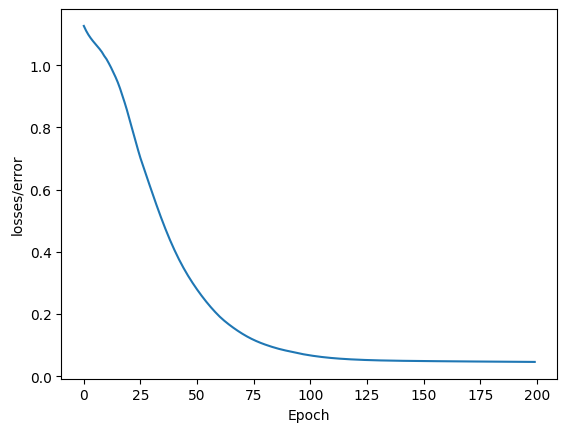

In [198]:
# Graph it out
plt.plot(range(epoch),losses)
plt.xlabel("Epoch")
plt.ylabel("losses/error")


In [199]:
# Evaluate model on Test Data Set (validate model on test set)
with torch.no_grad(): # Basically turn off back propagation
  y_eval = model.forward(x_test) # x_test are features from our test set, y_eval will be predictions
  loss = criterion(y_eval, y_test) # Find the loss or error

In [200]:
loss

tensor(0.0419)

In [201]:
correct = 0
with torch.no_grad():
  for i, data in enumerate(x_test):
    y_val = model.forward(data)

    if y_test[i] == 0:
      x = "Setosa"
    elif y_test[i] == 1:
      x = "Versicolor"
    else:
      x = "Virginica"

    # Will tell us what type of flower our network think it is
    print(f'{i+1}.) {str(y_val)} \t {y_test[i]} \t {y_val.argmax().item()}')

    # Correct or not
    if y_val.argmax().item() == y_test[i]:
      correct += 1
print(f'We got {correct} correct!')


1.) tensor([-6.3395,  4.5271,  7.4752]) 	 2 	 2
2.) tensor([-9.1121,  3.3424, 13.1048]) 	 2 	 2
3.) tensor([-10.2769,   4.1821,  14.1364]) 	 2 	 2
4.) tensor([-3.4142,  6.8884,  0.5272]) 	 1 	 1
5.) tensor([-8.3602,  4.4325, 10.8190]) 	 2 	 2
6.) tensor([-1.7577,  7.5762, -2.7971]) 	 1 	 1
7.) tensor([-6.2906,  5.1705,  6.7754]) 	 2 	 2
8.) tensor([-3.3610,  6.9862,  0.3514]) 	 1 	 1
9.) tensor([-7.3103,  4.8043,  8.7741]) 	 2 	 2
10.) tensor([-9.7834,  3.4750, 14.0815]) 	 2 	 2
11.) tensor([-5.9029,  5.2647,  6.0762]) 	 2 	 2
12.) tensor([ 11.2527,   1.8453, -15.4334]) 	 0 	 0
13.) tensor([ 10.5057,   1.6808, -14.2950]) 	 0 	 0
14.) tensor([-0.1860,  6.2497, -3.8621]) 	 1 	 1
15.) tensor([  9.2469,   2.5985, -13.4493]) 	 0 	 0
We got 15 correct!


In [202]:
# Use the trained NN to check a new iris type
new_iris = torch.tensor([4.7,3.2,1.3,0.2])

In [203]:
# Use the same thing we did we the test data set
with torch.no_grad():
  print(model(new_iris))

tensor([ 11.1018,   1.6681, -15.0696])
